In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [11]:
df = pd.read_csv('scores.csv')

In [12]:
df

,id,s1,s1_interaction,s2,s2_interaction,s3,s3_interaction,s4,s4_interaction,s5,...,s6,s6_interaction,s6.1,s6_interaction.1,s7,s7_interaction,s8,s8_interaction,s9,s9_interaction
0,1,3,1,5,0,1,1,4,0,4,...,1,1,1,0,1,0,3,0,4,0
1,2,2,0,3,0,3,0,4,0,5,...,2,1,1,0,1,1,2,0,5,0
2,3,4,0,3,0,3,1,4,1,4,...,2,1,1,0,1,1,3,0,4,0
3,4,2,0,4,1,3,0,2,0,4,...,2,1,1,0,2,0,2,0,3,1
4,5,2,0,5,1,1,1,5,0,4,...,1,0,1,0,2,0,3,1,4,0
5,6,3,1,5,0,1,1,3,0,4,...,2,1,1,0,3,1,3,0,4,0
6,7,2,0,3,0,1,0,3,0,4,...,2,1,2,1,2,0,3,0,4,0
7,8,4,0,5,0,1,1,5,0,5,...,2,1,1,0,2,1,3,0,5,0
8,9,2,0,5,0,2,1,2,1,4,...,1,1,1,0,2,0,2,0,5,1
9,10,2,1,5,0,1,1,5,0,4,...,2,1,1,0,2,0,3,0,5,0


In [13]:
all_scores = df[['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9']].values.flatten()

In [14]:
all_scores

array([3, 5, 1, 4, 4, 1, 1, 3, 4, 2, 3, 3, 4, 5, 2, 1, 2, 5, 4, 3, 3, 4,
       4, 2, 1, 3, 4, 2, 4, 3, 2, 4, 2, 2, 2, 3, 2, 5, 1, 5, 4, 1, 2, 3,
       4, 3, 5, 1, 3, 4, 2, 3, 3, 4, 2, 3, 1, 3, 4, 2, 2, 3, 4, 4, 5, 1,
       5, 5, 2, 2, 3, 5, 2, 5, 2, 2, 4, 1, 2, 2, 5, 2, 5, 1, 5, 4, 2, 2,
       3, 5, 3, 4, 3, 5, 4, 2, 2, 3, 4, 2, 5, 3, 5, 3, 1, 2, 4, 5, 4, 3,
       3, 5, 4, 1, 3, 2, 4, 3, 5, 3, 4, 4, 1, 2, 3, 4, 2, 5, 2, 2, 4, 1,
       2, 3, 2, 4, 5, 3, 5, 4, 1, 3, 4, 2, 2, 5, 2, 5, 4, 1, 2, 3, 3, 2,
       5, 3, 5, 4, 1, 2, 3, 4, 2, 3, 2, 5, 3, 3, 3, 3, 2, 3, 5, 3, 5, 4,
       1, 3, 3, 2, 2, 5, 3, 5, 5, 2, 3, 3, 4, 4, 3, 4, 5, 5, 3, 2, 4, 4,
       2, 5, 2, 4, 4, 2, 1, 4, 1, 2, 2, 3, 4, 4, 2, 2, 3, 4, 2, 5, 3, 4,
       3, 2, 2, 3, 5])

(array([0.09777778, 0.26222222, 0.24888889, 0.21777778, 0.17333333]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <BarContainer object of 5 artists>)

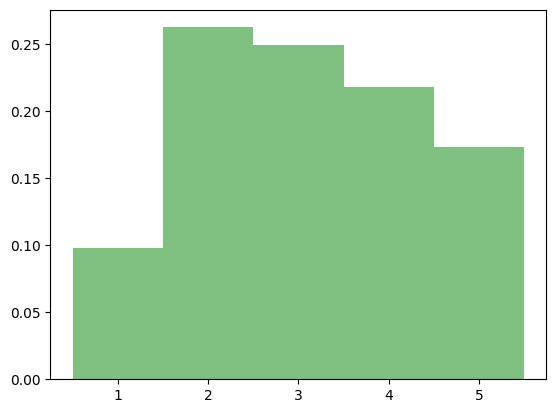

In [15]:
# Постройте гистограмму
plt.hist(all_scores, bins=np.arange(1, 7) - 0.5, density=True, alpha=0.5, color='g')

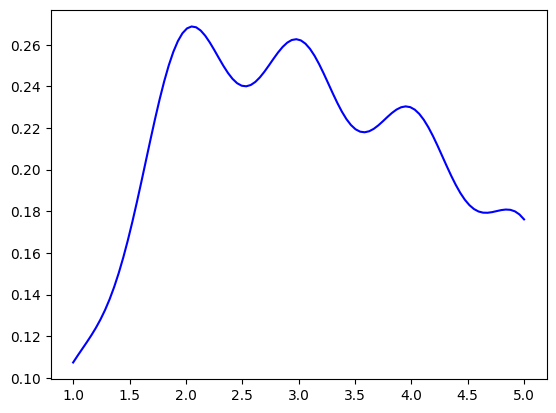

In [16]:
# Оценка плотности
kde = gaussian_kde(all_scores)
x = np.linspace(1, 5, 100)
plt.plot(x, kde(x), color='blue')


In [19]:
peak = x[np.argmax(kde(x))]  # Найти x, соответствующее пику

In [20]:
peak

2.0505050505050506

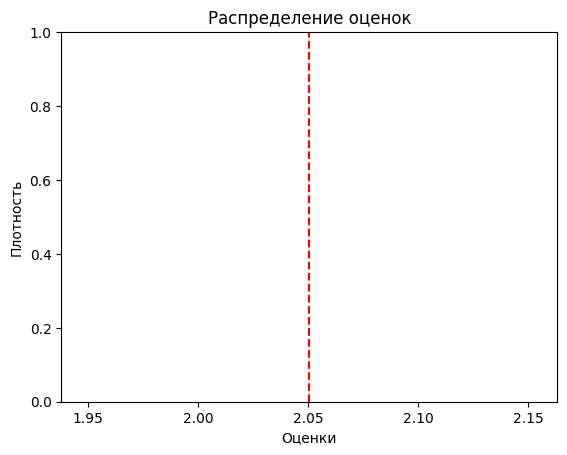

In [21]:

plt.axvline(peak, color='red', linestyle='--')
plt.title('Распределение оценок')
plt.xlabel('Оценки')
plt.ylabel('Плотность')
plt.show()

In [24]:
group_comfortable = all_scores[all_scores >= peak]
group_uncomfortable = all_scores[all_scores < peak]

In [25]:
score_columns = df.columns[df.columns.str.match(r'^s[1-9][0-9]?$')]

In [26]:
for col in score_columns:
    df[f'{col}_comfortable'] = df[col].apply(lambda x: 1 if x in group_comfortable else 0)
    df[f'{col}_uncomfortable'] = df[col].apply(lambda x: 1 if x in group_uncomfortable else 0)

In [27]:
df

,id,s1,s1_interaction,s2,s2_interaction,s3,s3_interaction,s4,s4_interaction,s5,...,s5_comfortable,s5_uncomfortable,s6_comfortable,s6_uncomfortable,s7_comfortable,s7_uncomfortable,s8_comfortable,s8_uncomfortable,s9_comfortable,s9_uncomfortable
0,1,3,1,5,0,1,1,4,0,4,...,1,0,0,1,0,1,1,0,1,0
1,2,2,0,3,0,3,0,4,0,5,...,1,0,0,1,0,1,0,1,1,0
2,3,4,0,3,0,3,1,4,1,4,...,1,0,0,1,0,1,1,0,1,0
3,4,2,0,4,1,3,0,2,0,4,...,1,0,0,1,0,1,0,1,1,0
4,5,2,0,5,1,1,1,5,0,4,...,1,0,0,1,0,1,1,0,1,0
5,6,3,1,5,0,1,1,3,0,4,...,1,0,0,1,1,0,1,0,1,0
6,7,2,0,3,0,1,0,3,0,4,...,1,0,0,1,0,1,1,0,1,0
7,8,4,0,5,0,1,1,5,0,5,...,1,0,0,1,0,1,1,0,1,0
8,9,2,0,5,0,2,1,2,1,4,...,1,0,0,1,0,1,0,1,1,0
9,10,2,1,5,0,1,1,5,0,4,...,1,0,0,1,0,1,1,0,1,0


In [28]:
df.to_csv('new_scores.csv', index=False)